<a href="https://colab.research.google.com/github/shicoded/Chance-of-Admit/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# read data
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# define target and features
y = df['Chance of Admit ']
X = df.drop(['Serial No','Chance of Admit '],axis=1)

Model Selection Stage

In [ ]:
# split into train and test sample
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)


In [ ]:
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [ ]:
# train model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [ ]:
# evaluate the model on training sample
dtr.score(X_train,y_train)

0.7738322816632399

In [ ]:
# cross validate model on train sample

from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)


{'fit_time': array([0.00977802, 0.00605273, 0.0042882 , 0.00457597, 0.00433254]),
 'score_time': array([0.00380468, 0.00292158, 0.00279427, 0.00274348, 0.00332594]),
 'test_score': array([0.62738225, 0.74911799, 0.55230282, 0.8131547 , 0.7219827 ])}

In [ ]:
# evaluate the model on the test sample
dtr.score(X_test,y_test)

0.7533283237506997

***Model Validation Stage***


In [ ]:
# model hyperparameters
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [ ]:
# hyperparameters selection
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [ ]:
# import pipeline
# define pipe line
pipe = Pipeline([('model', dtr)])
# grid search cv
grid = GridSearchCV(pipe,params,cv=5)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [ ]:
# train grid search
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [ ]:
# find best parama
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__random_state': 2529}

In [ ]:
# select best estimator
best = grid.best_estimator_

In [ ]:
# fit best estimator
best.fit(X_train,y_train)


Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=3, random_state=2529))])

In [ ]:
# predict with best estimator
y_pred=best.predict(X_test)

In [ ]:
# model error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
# mean absolute error
mean_absolute_error(y_test,y_pred)

0.057160452637289014

In [ ]:
# mean absolute percentage error
mean_absolute_percentage_error(y_test,y_pred)

0.09720961265635472

In [ ]:
# r square
r2_score(y_test,y_pred)

0.7533283237506997

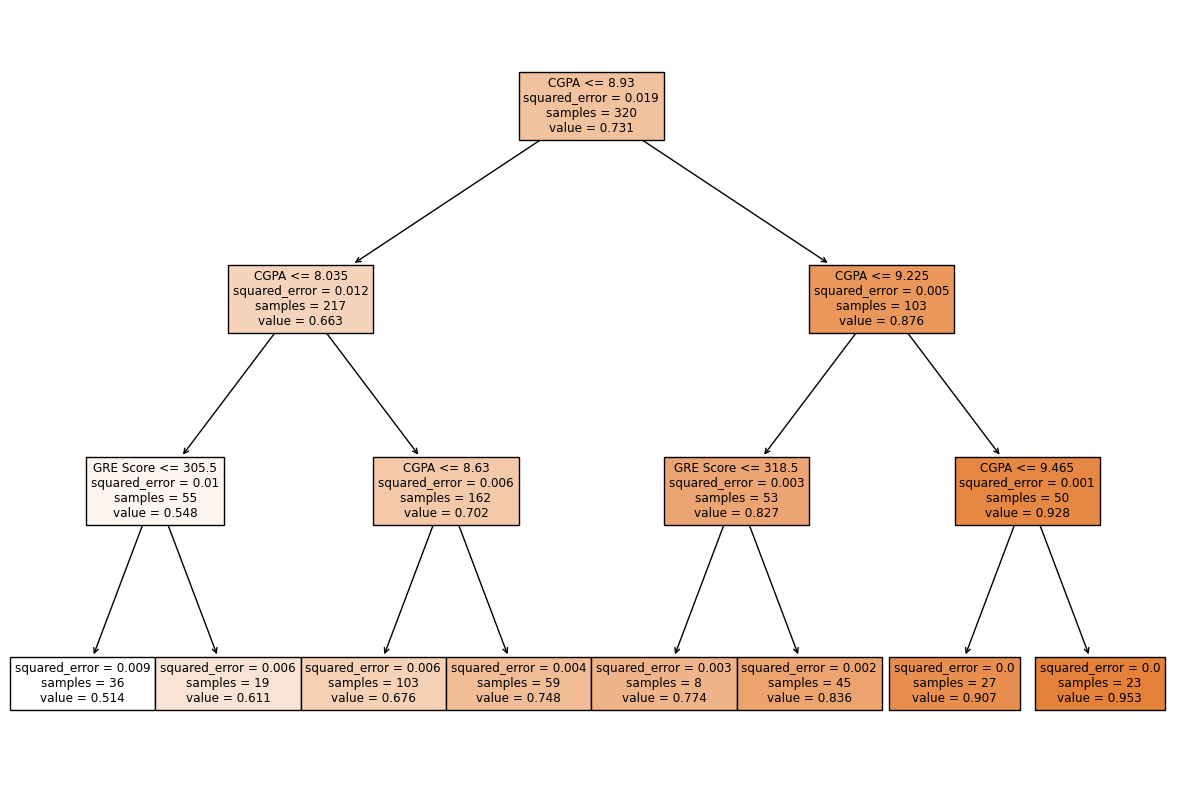

In [ ]:
# plot tree
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train,y_train)
plot_tree(final,feature_names=X.columns,filled=True);

**Save Model**


In [ ]:
# save model
import pickle

In [ ]:
# create an iterator object with write permission - model.pickle
with open('dtr_pkl', 'wb') as files:
    pickle.dump(best, files)

In [ ]:
# load saved model
with open('dtr_pkl' , 'rb') as f:
    dtr2 = pickle.load(f)

In [ ]:
# predict with saved model
dtr2.predict(X_test)

array([0.67572816, 0.67572816, 0.67572816, 0.67572816, 0.51444444,
       0.90703704, 0.9526087 , 0.74779661, 0.836     , 0.67572816,
       0.61052632, 0.74779661, 0.51444444, 0.77375   , 0.836     ,
       0.67572816, 0.67572816, 0.67572816, 0.74779661, 0.836     ,
       0.61052632, 0.836     , 0.836     , 0.9526087 , 0.74779661,
       0.61052632, 0.67572816, 0.51444444, 0.51444444, 0.61052632,
       0.51444444, 0.74779661, 0.74779661, 0.74779661, 0.61052632,
       0.51444444, 0.51444444, 0.836     , 0.90703704, 0.836     ,
       0.74779661, 0.67572816, 0.67572816, 0.90703704, 0.74779661,
       0.74779661, 0.9526087 , 0.90703704, 0.61052632, 0.51444444,
       0.67572816, 0.67572816, 0.836     , 0.51444444, 0.67572816,
       0.74779661, 0.67572816, 0.67572816, 0.836     , 0.67572816,
       0.67572816, 0.9526087 , 0.67572816, 0.67572816, 0.74779661,
       0.67572816, 0.61052632, 0.9526087 , 0.61052632, 0.90703704,
       0.61052632, 0.9526087 , 0.51444444, 0.67572816, 0.51444